In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("atmosphere_data1.csv")  # Importing the csv as a dataframe
df.head()

,humidity,pressure,rain,lightAvg,lightMax,moisture,temperature
0,87.64615,1027.830769,254.25,274.6232,4333,31.2385,24.06923
1,95.94805,1006.924675,339.75,14148.9787,54612,100.0000,21.20779
2,96.17143,1006.568571,38.25,134.9000,4000,93.2000,23.48571
3,98.58974,1009.415385,29.25,659.8889,4000,5.7692,21.79487
4,88.32710,991.654112,4.50,2168.3333,6295,4.2897,25.09346


In [3]:
# Find correlation coefficient
df['temperature'].corr(df['pressure'])

-0.5862511816495377

In [4]:
print(df['temperature'].corr(df['humidity']))
print(df.corr())

0.32042034947227643
             humidity  pressure      rain  lightAvg  lightMax  moisture  \
humidity     1.000000 -0.443664 -0.574543 -0.372385 -0.320195 -0.153100   
pressure    -0.443664  1.000000  0.435406  0.212624  0.112181  0.105356   
rain        -0.574543  0.435406  1.000000  0.539015  0.347064  0.451626   
lightAvg    -0.372385  0.212624  0.539015  1.000000  0.634159  0.349297   
lightMax    -0.320195  0.112181  0.347064  0.634159  1.000000  0.038260   
moisture    -0.153100  0.105356  0.451626  0.349297  0.038260  1.000000   
temperature  0.320420 -0.586251 -0.187917 -0.225644 -0.093311  0.001578   

             temperature  
humidity        0.320420  
pressure       -0.586251  
rain           -0.187917  
lightAvg       -0.225644  
lightMax       -0.093311  
moisture        0.001578  
temperature     1.000000  


In [5]:
print("The Data set has {} rows and {} columns\n".format(df.shape[0],df.shape[1]))


The Data set has 819 rows and 7 columns



In [6]:
#Names of all columns
columns = df.columns.values.tolist()
#Checking for Null Values:
vals=df[columns].isnull().sum()
print(vals)
print("\nTotal NAN values in the File: ",vals.sum())

humidity       0
pressure       0
rain           0
lightAvg       0
lightMax       0
moisture       0
temperature    0
dtype: int64

Total NAN values in the File:  0


In [7]:
Y = df["temperature"]
X = df["pressure"]

In [8]:

#Predictor
[X_train, X_test, Y_train, Y_test] = train_test_split(X, Y,test_size=0.3, random_state=42,shuffle=True)

X_train = np.array(X_train)
print(X_train.shape)
X_train = X_train.reshape(-1,1)  #X_train.reshape(573,1)
print(X_train.shape)
print(X_train.ndim)
X_test = np.array(X_test)
X_test = X_test.reshape(-1,1)
print(X_test.ndim)

(573,)
(573, 1)
2
2


In [9]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
y_pred_train = regressor.predict(X_train)
print(y_pred_train.ndim)
y_pred_test = regressor.predict(X_test)
print(y_pred_test.ndim)

1
1


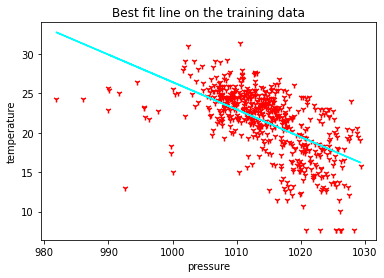

In [10]:

plt.scatter(X_train,Y_train,marker = "1", c = "red") # Original data points
plt.plot(X_train,y_pred_train,c= "cyan" )  # Predicted line
plt.xlabel("pressure")
plt.ylabel("temperature")
plt.title("Best fit line on the training data")
plt.show()

In [11]:
MSE_train = mean_squared_error(Y_train,y_pred_train)
RMSE_train = np.sqrt(MSE_train)
print("RMSE TRAIN :",RMSE_train)

RMSE TRAIN : 3.412105092946124


In [12]:
MSE_test = mean_squared_error(Y_test,y_pred_test)
RMSE_test = np.sqrt(MSE_test)
print("RMSE TEST :",RMSE_test,"\n")

RMSE TEST : 2.9769257038062733 



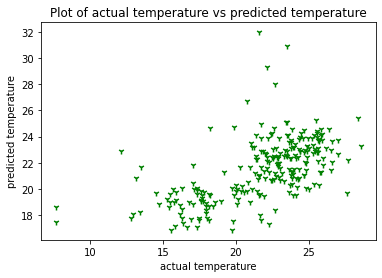

In [13]:
plt.scatter(Y_test,y_pred_test,marker = "1",color = "green")
plt.xlabel("actual temperature")
plt.ylabel("predicted temperature")
plt.title("Plot of actual temperature vs predicted temperature")
plt.show()